# 신경망 회귀 모델

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

zip_path = tensorflow.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
df = df[5::6]  # 5 부터, step = 6
df.head()
df = df.drop("Tpot (K)", axis=1)
df.drop_duplicates(inplace=True)
df["wv (m/s)"][df["wv (m/s)"] == -9999.0] = 0
df["max. wv (m/s)"][df["max. wv (m/s)"] == -9999.0] = 0
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")
df.set_index("Date Time", inplace=True)

target = df["T (degC)"]
input = df.drop("T (degC)", axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = Sequential()
model.add(Input(12))
model.add(Dense(128, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(loss="mse", optimizer="adam", metrics=["mse"])
mc = ModelCheckpoint(filepath="best_model.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(patience=10, monitor="val_loss")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=100, callbacks=[mc, es])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13332\1615210089.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wv (m/s)"][df["wv (m/s)"] == -9999.0] = 0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13332\1615210089.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["max. wv (m/s)"][df["max. wv (m/s)"] == -9999.0] = 0


(49046, 12) (21021, 12) (49046,) (21021,)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               1664      
                                                                 
 dense_32 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1793 (7.00 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
459/491 [===========================>..] - ETA: 0s - loss: 2397.0671 - mse: 2397.0671
Epoch 1: val_loss improved from inf to 7.30735, saving model to best_model.hdf5
491/491 [==============================] - 1s 2ms/step - loss: 2243.7969 - mse: 2243.7969 - val_loss: 7.3073 - val_mse: 7.3073
Epoch 2/100
149/491 [========>.....................] - ETA: 0s - loss:

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


445/491 [==========================>...] - ETA: 0s - loss: 4.8297 - mse: 4.8297
Epoch 2: val_loss improved from 7.30735 to 3.08136, saving model to best_model.hdf5
491/491 [==============================] - 1s 1ms/step - loss: 4.6877 - mse: 4.6877 - val_loss: 3.0814 - val_mse: 3.0814
Epoch 3/100
449/491 [==========================>...] - ETA: 0s - loss: 2.5613 - mse: 2.5613
Epoch 3: val_loss improved from 3.08136 to 2.08890, saving model to best_model.hdf5
491/491 [==============================] - 1s 1ms/step - loss: 2.5384 - mse: 2.5384 - val_loss: 2.0889 - val_mse: 2.0889
Epoch 4/100
450/491 [==========================>...] - ETA: 0s - loss: 1.8764 - mse: 1.8764
Epoch 4: val_loss improved from 2.08890 to 1.53202, saving model to best_model.hdf5
491/491 [==============================] - 1s 1ms/step - loss: 1.8500 - mse: 1.8500 - val_loss: 1.5320 - val_mse: 1.5320
Epoch 5/100
445/491 [==========================>...] - ETA: 0s - loss: 1.3680 - mse: 1.3680
Epoch 5: val_loss improved fr

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

657/657 [==============================] - 1s 806us/step


0.9967223806262957

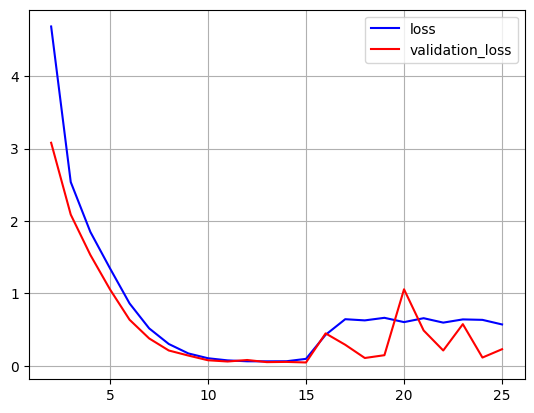

In [53]:
# loss 값이 가장 낮은 모델 찾기
# 모델을 찾으면 checkpoint 지정

loss = history.history["loss"]
val_loss = history.history["val_loss"]

x = np.arange(1, len(loss) + 1)
plt.plot(x[1:], loss[1:], color="blue", label="loss")
plt.plot(x[1:], val_loss[1:], color="red", label="validation_loss")
plt.grid()
plt.legend(loc="best")
plt.show()

In [54]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.hdf5")
print(best_model.evaluate(X_test, y_test))
print(r2_score(y_test, best_model.predict(X_test)))

657/657 [==============================] - 1s 1ms/step - loss: 0.0461 - mse: 0.0461
[0.04613380879163742, 0.04613380879163742]
657/657 [==============================] - 1s 962us/step
0.9993410081699948


In [55]:
best_model.predict(input[:2])

1/1 [==============================] - 0s 20ms/step


array([[-8.111777],
       [-8.941062]], dtype=float32)

In [56]:
target[:2]

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
Name: T (degC), dtype: float64

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

concrete = pd.read_csv("../contents/concrete_na.csv")
#1. 결측치=> 다버리기
concrete.dropna(how="any", inplace=True)
#2. 중복 확인 후 버리기
print(concrete.duplicated().sum())
concrete.drop_duplicates(inplace=True)
print(concrete.duplicated().sum())
#3. input, target => task 정함
input = concrete.drop("strength", axis=1)
target = concrete["strength"]
print(input.shape, target.shape)
#4. train set,test set 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input.values, target.values, test_size=0.2, shuffle=True,
                                                    random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

25
0
(995, 8) (995,)
(796, 8) (199, 8) (796,) (199,)


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#구조설계
model = Sequential()
model.add(Input(8))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
mc = ModelCheckpoint(filepath="best_model.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(patience=10, monitor="val_loss")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200, callbacks=[mc, es])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1152      
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1/8 [==>...........................] - ETA: 4s - loss: 4428.0854 - mae: 63.3728
Epoch 1: val_loss improved from inf to 891.14917, saving model to best_model.hdf5
8/8 [==============================] - 1s 23ms/step - loss: 1554.9841 - mae: 32.2906 - val_loss: 891.1492 - v

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 8ms/step - loss: 257.8768 - mae: 13.0905 - val_loss: 190.2237 - val_mae: 11.3350
Epoch 5/200
1/8 [==>...........................] - ETA: 0s - loss: 223.4932 - mae: 11.7165
Epoch 5: val_loss improved from 190.22366 to 140.75334, saving model to best_model.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 176.7636 - mae: 10.5203 - val_loss: 140.7533 - val_mae: 9.5208
Epoch 6/200
1/8 [==>...........................] - ETA: 0s - loss: 128.9353 - mae: 9.4269
Epoch 6: val_loss did not improve from 140.75334
8/8 [==============================] - 0s 6ms/step - loss: 146.5971 - mae: 9.7903 - val_loss: 140.9476 - val_mae: 9.2402
Epoch 7/200
1/8 [==>...........................] - ETA: 0s - loss: 144.6422 - mae: 10.0528
Epoch 7: val_loss improved from 140.75334 to 119.21951, saving model to best_model.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 128.4923 - mae: 9.0839 - val_loss: 119.2195 - val_mae: 8.3764
Epoch 8/200
1/8 

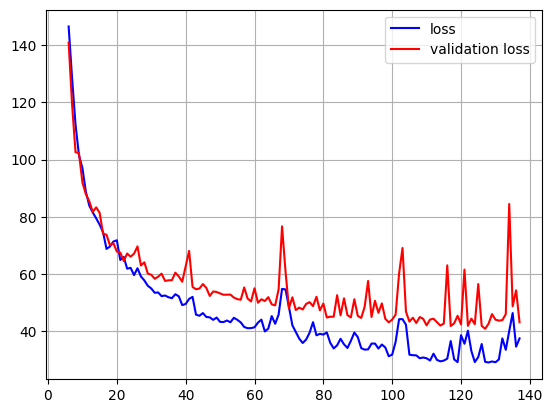

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
x = np.arange(1, len(loss) + 1)
plt.plot(x[5:], loss[5:], color="blue", label='loss')
plt.plot(x[5:], val_loss[5:], color="red", label='validation loss')
plt.grid()
plt.legend(loc="best")
plt.show()

In [61]:
from tensorflow.keras.models import load_model
best_model=load_model("./best_model.hdf5")
print(best_model.evaluate(X_test, y_test))
print(r2_score(y_test, best_model.predict(X_test)))

7/7 [==============================] - 0s 1ms/step - loss: 40.7507 - mae: 4.6796
[40.7507438659668, 4.679647922515869]
7/7 [==============================] - 0s 2ms/step
0.8405197171182639
